In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import csv

In [166]:
df = pd.read_csv('/Users/aasthaprajapati/Downloads/fcc-forum-pageviews.csv', index_col="date" , parse_dates=True)

In [167]:
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [168]:
df.set_index('date')

KeyError: "None of ['date'] are in the columns"

In [169]:
dfClean = df[
    (df['value']>df['value'].quantile(0.025)) & 
    (df['value']<df['value'].quantile(0.975))
]

In [170]:
dfClean.set_index('date')

KeyError: "None of ['date'] are in the columns"

[Text(0.5, 1.0, 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019'),
 Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Page Views')]

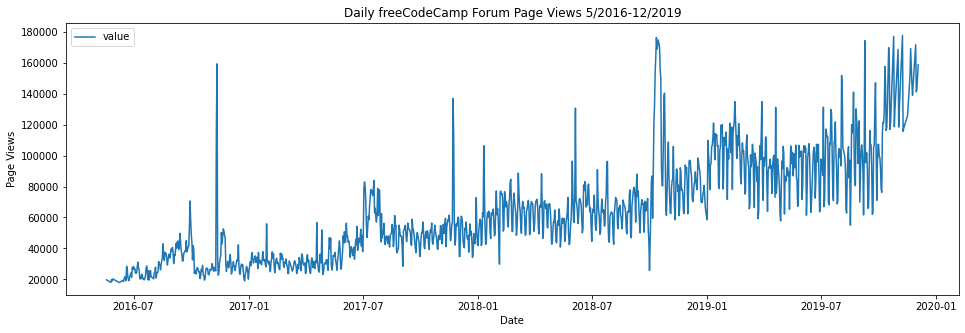

In [171]:
fig, ax = plt.subplots(figsize =(16,5))
ax = sns.lineplot(data = dfClean, legend ='brief', )
ax.set(title = 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019', xlabel='Date', ylabel='Page Views')

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Page Views')]

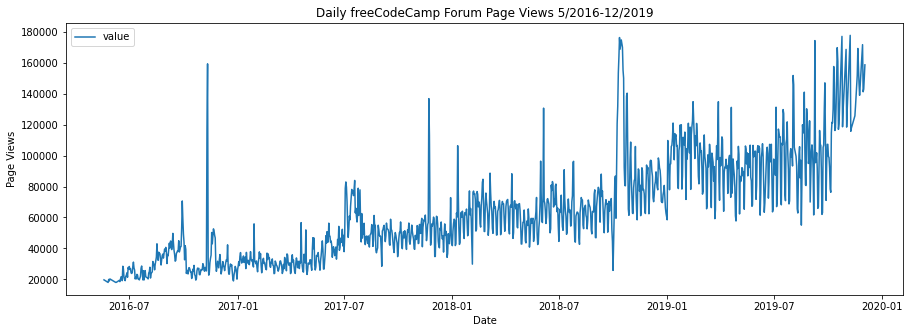

In [172]:
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.lineplot(data = dfClean, legend="brief")
ax.set(title='Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
ax.set(xlabel = "Date",ylabel = "Page Views")

In [179]:
dfClean

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


In [180]:
df_bar = dfClean.copy()

[Text(0.5, 0, 'Years'), Text(0, 0.5, 'Average Page Views')]

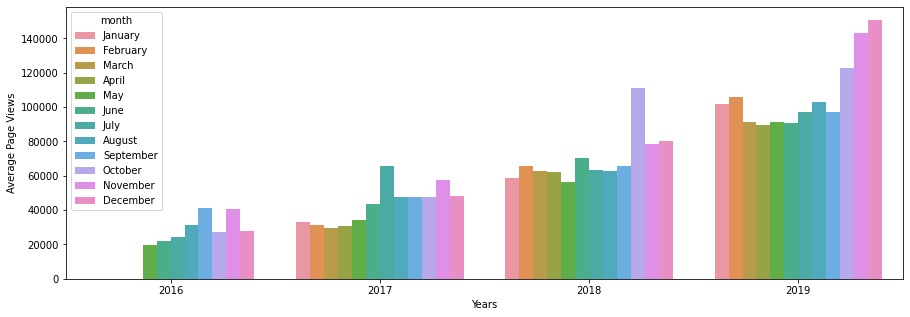

In [199]:
months= ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_bar = dfClean.copy()
df_bar["year"] = dfClean.index.year.values
df_bar["month"] = dfClean.index.month_name()
# df_bar = df_bar.sort_values('month')

fig, ax = plt.subplots(figsize=(15,5))
ax = sns.barplot(x="year", hue="month", y="value", data=df_bar, hue_order = months, ci=None)
sns.color_palette("Paired")

ax.set(xlabel = "Years",ylabel = "Average Page Views")

In [205]:
df_bar

,value,year,month
date,,,
2016-05-19,19736,2016,May
2016-05-26,18060,2016,May
2016-05-27,19997,2016,May
2016-05-28,19044,2016,May
2016-05-29,20325,2016,May
...,...,...,...
2019-11-24,138875,2019,November
2019-11-29,171584,2019,November
2019-11-30,141161,2019,November


[Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Page Views'),
 Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)')]

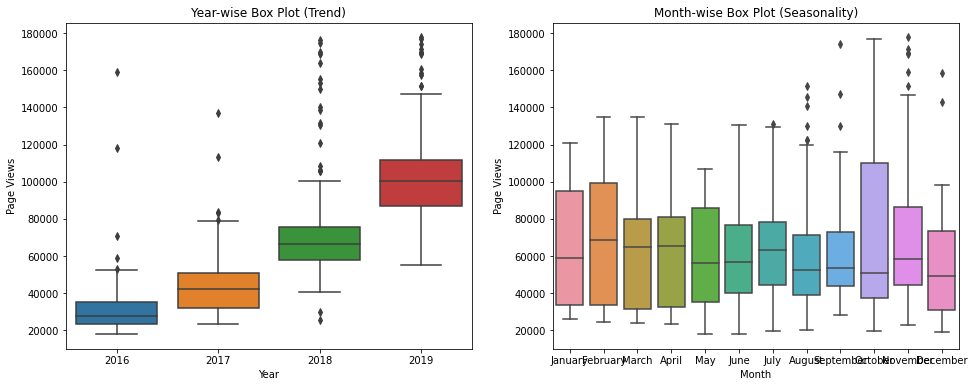

In [216]:
    df_box = dfClean.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = dfClean.index.year.values
    df_box['month'] = dfClean.index.month_name()

    # Draw box plots (using Seaborn)
    df_box['monthnumber'] = dfClean.index.month
    df_box = df_box.sort_values('monthnumber')
    fig, ax = plt.subplots(1,2,figsize=(16,6))
    sns.boxplot(y = "value", x = "year", data = df_box, ax = ax[0] ) 
    ax[0].set(xlabel="Year", ylabel="Page Views", title="Year-wise Box Plot (Trend)")
    sns.boxplot(y = "value", x = "month", data = df_box, ax = ax[1])
    ax[1].set(xlabel="Month", ylabel="Page Views", title="Month-wise Box Plot (Seasonality)")

In [217]:
df_box

,date,value,year,month,monthnumber
210,2017-01-06,37353,2017,January,1
937,2019-01-06,94108,2019,January,1
936,2019-01-05,77897,2019,January,1
935,2019-01-04,94514,2019,January,1
934,2019-01-03,100710,2019,January,1
...,...,...,...,...,...
567,2017-12-29,72819,2017,December,12
566,2017-12-28,51018,2017,December,12
565,2017-12-27,43075,2017,December,12
201,2016-12-28,28424,2016,December,12
